# Problem Statement
In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA

### Loading dataset

In [2]:

iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Number of samples:")

print(X.shape[0])
print('---------------------------------------------------------------------------')
print('Number of features :')
print(X.shape[1])
print('---------------------------------------------------------------------------')
print("Feature names:")
print('---------------------------------------------------------------------------')
print(iris.feature_names)

Number of samples:
150
---------------------------------------------------------------------------
Number of features :
4
---------------------------------------------------------------------------
Feature names:
---------------------------------------------------------------------------
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Feature scaling prior to applying PCA

In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print('shape of scaled data points:')
print('---------------------------------------------------------------------------')
print(X_scaled.shape)
print('first 5 rows of scaled data points :')
print('---------------------------------------------------------------------------')
print(X_scaled[:5,:])

shape of scaled data points:
---------------------------------------------------------------------------
(150, 4)
first 5 rows of scaled data points :
---------------------------------------------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


### Looking at the explained variance as a function of the components

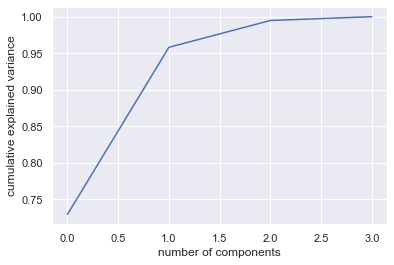

In [4]:
sns.set()
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Note
Here we see that we'd need about 3 components to retain 100% of the variance. Looking at this plot for a high-dimensional dataset can help us understand the level of redundancy present in multiple observations.

### PCA using Eigen-decomposition: 5-step process

In [5]:

# 1. Normalize columns of A so that each feature has zero mean
A0 = iris.data
mu = np.mean(A0,axis=0)
A = A0 - mu
print("Does A have zero mean across rows?")
print(np.mean(A,axis=0))
print('--------------------------------------------------------------------------')
print('Mean value : ')
print('--------------------------------------------------------------------------')
print(mu)
print('Standardized Feature value first 5 rows: ')
print('--------------------------------------------------------------------------')
print(A[:5,:])

# 2. Compute sample covariance matrix Sigma = {A^TA}/{(m-1)}
#covariance matrix can also be computed using np.cov(A.T)
m,n = A.shape
Sigma = (A.T @ A)/(m-1)
print("--------------------------------------------------------------------------")
print("Sigma:")
print(Sigma)

# 3. Perform eigen-decomposition of Sigma using `np.linalg.eig(Sigma)`
W,V = np.linalg.eig(Sigma)
print("---------------------------------------------------------------------------")
print("Eigen values:")
print(W)
print("---------------------------------------------------------------------------")
print("Eigen vectors:")
print(V)

# 4. Compress by ordering 3 eigen vectors according to largest eigen values and compute AX_k
print("----------------------------------------------------------------------------")
print("Compressed - 4D to 3D:")
print("----------------------------------------------------------------------------")
print('First 3 eigen vectors :')
print(V[:,:3] )
print("----------------------------------------------------------------------------")
Acomp = A @ V[:,:3] 
print('First first five rows of transformed features :')
print("----------------------------------------------------------------------------")
print(Acomp[:5,:]) 


# 5. Reconstruct from compressed version by computing $A V_k V_k^T$
print("----------------------------------------------------------------------------")
print("Reconstructed version - 3D to 4D:")
print("----------------------------------------------------------------------------")
Arec = A @ V[:,:3] @ V[:,:3].T # first 3 evectors
print(Arec[:5,:]+mu) # first 5 obs, adding mu to compare to original

Does A have zero mean across rows?
[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]
--------------------------------------------------------------------------
Mean value : 
--------------------------------------------------------------------------
[5.84333333 3.05733333 3.758      1.19933333]
Standardized Feature value first 5 rows: 
--------------------------------------------------------------------------
[[-0.74333333  0.44266667 -2.358      -0.99933333]
 [-0.94333333 -0.05733333 -2.358      -0.99933333]
 [-1.14333333  0.14266667 -2.458      -0.99933333]
 [-1.24333333  0.04266667 -2.258      -0.99933333]
 [-0.84333333  0.54266667 -2.358      -0.99933333]]
--------------------------------------------------------------------------
Sigma:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
-----------------------------

### Original iris feature values

In [6]:
iris.data[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

### 3D Visualization

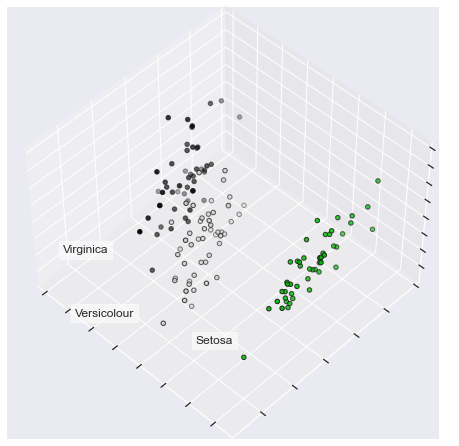

In [7]:
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=48, azim=134)
y= iris.target
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(Acomp[y == label, 0].mean(),
              Acomp[y == label, 1].mean() + 1.5,
              Acomp[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(Acomp[:, 0], Acomp[:, 1], Acomp[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()